## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

## Data Loading

In [2]:
data = pd.read_csv('train.csv')

In [3]:
df = data.copy()

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Understanding Data

In [5]:
df.shape

(614, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
for i in df.columns:
    print(i)
    print(f"No. of unique values in {i} is: ",df[i].nunique())
    print()

Loan_ID
No. of unique values in Loan_ID is:  614

Gender
No. of unique values in Gender is:  2

Married
No. of unique values in Married is:  2

Dependents
No. of unique values in Dependents is:  4

Education
No. of unique values in Education is:  2

Self_Employed
No. of unique values in Self_Employed is:  2

ApplicantIncome
No. of unique values in ApplicantIncome is:  505

CoapplicantIncome
No. of unique values in CoapplicantIncome is:  287

LoanAmount
No. of unique values in LoanAmount is:  203

Loan_Amount_Term
No. of unique values in Loan_Amount_Term is:  10

Credit_History
No. of unique values in Credit_History is:  2

Property_Area
No. of unique values in Property_Area is:  3

Loan_Status
No. of unique values in Loan_Status is:  2



## EDA

As per common sense we can figure this out that there is no significance relationship between Loan_ID and Loan Status. So let's drop it.

In [10]:
df.drop(['Loan_ID'], axis=1, inplace=True)

As few of the columns are categorical and continuous. Let's divide it into two columns.

In [11]:
cat_col = [] #for Categorical Columns
num_col = [] #for Numerical Columns

for i in df.columns:
    if df[i].nunique() < 10:
        cat_col.append(i)
    else:
        num_col.append(i)

### Missing Values

`For Numerical Values`

In [12]:
num_col

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [13]:
df[num_col].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,NaN,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0


In [14]:
df[num_col].isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
dtype: int64

So, only LoanAmount have null values among our continuous numerical columns.

In [15]:
### filling NaN value of LoanAmount by meadian of the column

df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

`For categorical values`

In [16]:
cat_col

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [17]:
df[cat_col].head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [18]:
df[cat_col].isnull().sum()

Gender            13
Married            3
Dependents        15
Education          0
Self_Employed     32
Credit_History    50
Property_Area      0
Loan_Status        0
dtype: int64

In categiorcal and discrete columns we gave missing values in all but Education, Property_Area, Loan_Status.

In [19]:
### filling NaN value of categorical columns by mode of the column

for i in cat_col:
    if df[i].isnull().sum() == 0:
        pass
    else:
        df[i].fillna(df[i].mode()[0], inplace=True)

### Encoding

In [20]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
for i in cat_col:
    df[i] = encoder.fit_transform(df[i])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1


In [21]:
for i in cat_col:
    print(i)
    print(df[i].value_counts())
    print()

Gender
1    502
0    112
Name: Gender, dtype: int64

Married
1    401
0    213
Name: Married, dtype: int64

Dependents
0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

Education
0    480
1    134
Name: Education, dtype: int64

Self_Employed
0    532
1     82
Name: Self_Employed, dtype: int64

Credit_History
1    525
0     89
Name: Credit_History, dtype: int64

Property_Area
1    233
2    202
0    179
Name: Property_Area, dtype: int64

Loan_Status
1    422
0    192
Name: Loan_Status, dtype: int64



<AxesSubplot:>

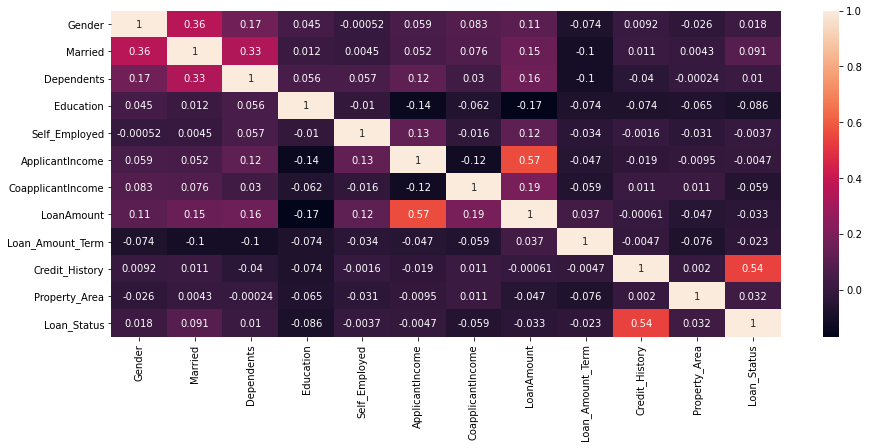

In [22]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

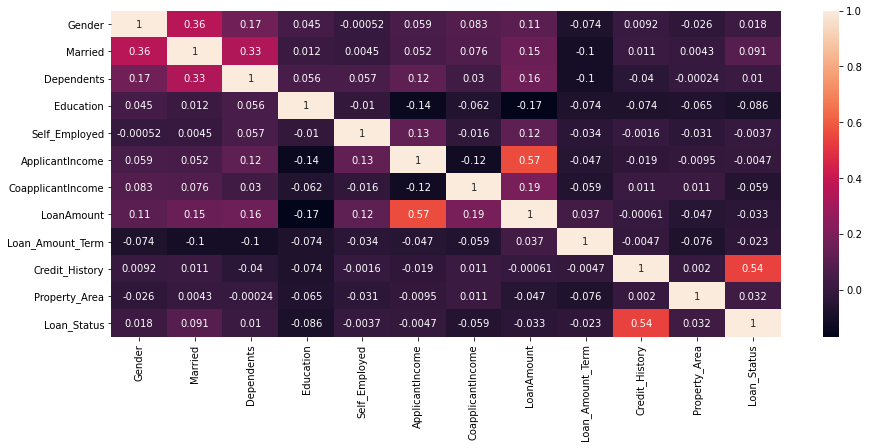

In [23]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True)

Credit_History is the most important feature for the prediction of Loan_Status among all columns.

Very less colinearity among independent variables as well. Only LoanAmount and Applicant Income seems more related to each other, and Marraige with Dependencies and Gender.

Let's try to find out informations from our data.

### Data Analysis

<AxesSubplot:ylabel='ApplicantIncome'>

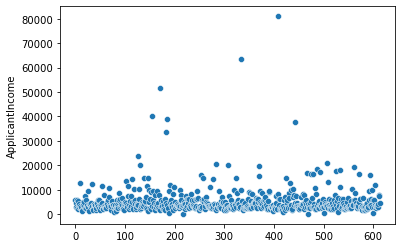

In [24]:
sns.scatterplot( x=df['ApplicantIncome'].index, y='ApplicantIncome', data=df)

In [25]:
print("Population whose income is between 0-5000 applied for loan are:")
print(len(df[(df['ApplicantIncome']>0) & (df['ApplicantIncome']<5000)]))
print()
print("Population whose income is between 5000-10000 applied for loan are:")
print(len(df[(df['ApplicantIncome']>5000) & (df['ApplicantIncome']<10000)]))
print()
print("Population whose income is between 10000-15000 applied for loan are:")
print(len(df[(df['ApplicantIncome']>10000) & (df['ApplicantIncome']<15000)]))
print()
print("Population whose income is between 15000-20000 applied for loan are:")
print(len(df[(df['ApplicantIncome']>15000) & (df['ApplicantIncome']<20000)]))
print()
print("Population whose income is above 20000 applied for loan are:")
print(len(df[(df['ApplicantIncome']>20000)]))
print()

Population whose income is between 0-5000 applied for loan are:
418

Population whose income is between 5000-10000 applied for loan are:
136

Population whose income is between 10000-15000 applied for loan are:
26

Population whose income is between 15000-20000 applied for loan are:
13

Population whose income is above 20000 applied for loan are:
12



So, very less population earns more than 10000 and majority of population earns between 0-5000. Let's go further with ApplicantIncome.

##### Applicant Income VS Education

<AxesSubplot:ylabel='ApplicantIncome'>

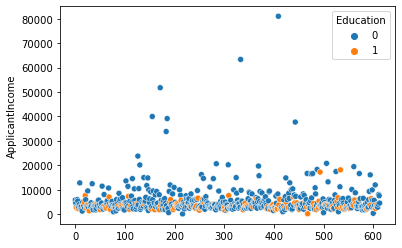

In [26]:
sns.scatterplot( x=df['ApplicantIncome'].index, y='ApplicantIncome', data=df, hue='Education', legend=True)

In [27]:
print("Population whose income is between 0-5000 applied for loan and their Education is Graduate:")
print(np.round(len(df[(df['ApplicantIncome']>0) & (df['ApplicantIncome']<5000) & (df['Education']==0)])/\
      len(df[(df['ApplicantIncome']>0) & (df['ApplicantIncome']<5000)])*100,2))
print()

print("Population whose income is between 5000-10000 applied for loan and there Education is Graduate:")
print(np.round(len(df[(df['ApplicantIncome']>5000) & (df['ApplicantIncome']<10000) & (df['Education']==0)])/\
      len(df[(df['ApplicantIncome']>5000) & (df['ApplicantIncome']<10000)])*100,2))
print()

print("Population whose income is between 10000-15000 applied for loan and there Education is Graduate:")
print(np.round(len(df[(df['ApplicantIncome']>10000) & (df['ApplicantIncome']<15000) & (df['Education']==0)])/\
      len(df[(df['ApplicantIncome']>10000) & (df['ApplicantIncome']<15000)])*100,2))
print()

print("Population whose income is between 15000-20000 applied for loan and there Education is Graduate:")
print(np.round(len(df[(df['ApplicantIncome']>15000) & (df['ApplicantIncome']<20000) & (df['Education']==0)])/\
      len(df[(df['ApplicantIncome']>15000) & (df['ApplicantIncome']<20000)])*100,2))
print()

print("Population whose income is above 20000 applied for loan and there Education is Graduate:")
print(np.round(len(df[(df['ApplicantIncome']>20000) & (df['Education']==0)])/\
      len(df[(df['ApplicantIncome']>20000)])*100,2))
print()

Population whose income is between 0-5000 applied for loan and their Education is Graduate:
72.73

Population whose income is between 5000-10000 applied for loan and there Education is Graduate:
86.76

Population whose income is between 10000-15000 applied for loan and there Education is Graduate:
100.0

Population whose income is between 15000-20000 applied for loan and there Education is Graduate:
84.62

Population whose income is above 20000 applied for loan and there Education is Graduate:
100.0



**Analysis**: So what I observe is, ApplicantIncome of Graduates are higher than that of Non-Graduates. As, ApplicantIncome increases number of Non-Graduats decreses but few peoples have higher Income but they are Non-Graduates. It might be possible that there is a mistake in out data or they might be a good businessman.

Let's check if they are Self-Emoloyed or not.

In [28]:
(df[(df['ApplicantIncome']>15000) & (df['ApplicantIncome']<20000) & (df['Education']==1)])

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
493,0,0,0,1,1,17263,0.0,225.0,360.0,1,1,1
534,0,0,0,1,1,18165,0.0,125.0,360.0,1,2,1


**Analysis**: Bang On!! Acurate Prediction. They just being a good business man to earn more.

##### ApplicantIncome VS Credit_History

<AxesSubplot:ylabel='ApplicantIncome'>

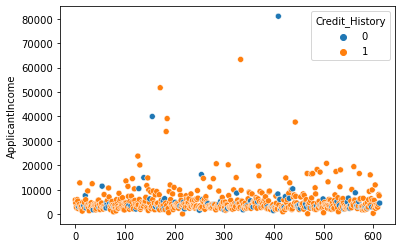

In [29]:
sns.scatterplot( x=df['ApplicantIncome'].index, y='ApplicantIncome', data=df, hue='Credit_History', legend=True)

In [30]:
print("Population whose income is between 0-5000 applied for loan and have 0 Credit_History:")
print(np.round(len(df[(df['ApplicantIncome']>0) & (df['ApplicantIncome']<5000) & (df['Credit_History']==0)])/\
      len(df[(df['ApplicantIncome']>0) & (df['ApplicantIncome']<5000)])*100,2))
print()

print("Population whose income is between 5000-10000 applied for loan and have 0 Credit_History:")
print(np.round(len(df[(df['ApplicantIncome']>5000) & (df['ApplicantIncome']<10000) & (df['Credit_History']==0)])/\
      len(df[(df['ApplicantIncome']>5000) & (df['ApplicantIncome']<10000)])*100,2))
print()

print("Population whose income is between 10000-15000 applied for loan and have 0 Credit_History:")
print(np.round(len(df[(df['ApplicantIncome']>10000) & (df['ApplicantIncome']<15000) & (df['Credit_History']==0)])/\
      len(df[(df['ApplicantIncome']>10000) & (df['ApplicantIncome']<15000)])*100,2))
print()

print("Population whose income is between 15000-20000 applied for loan and have 0 Credit_History:")
print(np.round(len(df[(df['ApplicantIncome']>15000) & (df['ApplicantIncome']<20000) & (df['Credit_History']==0)])/\
      len(df[(df['ApplicantIncome']>15000) & (df['ApplicantIncome']<20000)])*100,2))
print()

print("Population whose income is above 20000 applied for loan and have 0 Credit_History:")
print(np.round(len(df[(df['ApplicantIncome']>20000) & (df['Credit_History']==0)])/\
      len(df[(df['ApplicantIncome']>20000)])*100,2))
print()

Population whose income is between 0-5000 applied for loan and have 0 Credit_History:
14.83

Population whose income is between 5000-10000 applied for loan and have 0 Credit_History:
13.24

Population whose income is between 10000-15000 applied for loan and have 0 Credit_History:
15.38

Population whose income is between 15000-20000 applied for loan and have 0 Credit_History:
7.69

Population whose income is above 20000 applied for loan and have 0 Credit_History:
16.67



**Analysis**: Very few people doesn't have any credit history. As we have also seen above Credit_history plays an important role in prediction of the Loan_Status.

In [31]:
print(np.round((len(df[(df['Credit_History']==0) & (df['Loan_Status']==0)])/len(df[(df['Credit_History']==0)]))*100,2))
(df[(df['Credit_History']==0)])['Loan_Status'].value_counts()

92.13


0    82
1     7
Name: Loan_Status, dtype: int64

**Analysis**: As we can observe if credit History is 0 then 92% of chances are Loan will be rejected. But, in what cases Loan is approved. Let's check ot out.

In [32]:
(df[(df['Credit_History']==0) & (df['Loan_Status']==1)])

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
122,0,0,0,0,0,2137,8980.0,137.0,360.0,0,1,1
155,1,1,3,0,0,39999,0.0,600.0,180.0,0,1,1
201,1,0,2,0,0,4923,0.0,166.0,360.0,0,1,1
267,1,1,3,0,0,4333,1811.0,160.0,360.0,0,2,1
326,1,0,0,0,0,4917,0.0,130.0,360.0,0,0,1
453,1,1,0,0,0,2483,2466.0,90.0,180.0,0,0,1
527,1,1,1,1,0,5285,1430.0,161.0,360.0,0,1,1


**Analysis**: So if your Credit_History is 0, you must not be Self_Employed because in all cases person with 0 Credit_History gets there Loan Accepted are not Self_Employed and also your chances are higher if you are Male and Married as in 85% cases Unmarried and Males are preferrable and You should be returning amount within a year.

So, we can do one this if there is no Credit_History then he/she must not be Self_Employed.

#### Feature Engineering

In [33]:
Credit_Self = []
for i in range(len(df)):
    if (df['Credit_History'][i]==0):
        if df['Loan_Status'][i]==1:
            Credit_Self.append(1)
        else:
            Credit_Self.append(0)
            
    else:
        Credit_Self.append(1)
        
df['Credit_Self'] = Credit_Self

Now, we're left with no use of Credit_History. So let's drop it.

In [34]:
df.drop(['Credit_History'], axis=1, inplace=True)

Now, I think ApplicantIncome and CoapplicantIncome is actually the Income from the applicant side. Basically family members or close friends applied for Loan together as a Coaaplicant. So, let's merge them to get an effectful output from it.

In [35]:
df['Total_Income'] = df['ApplicantIncome']+ df['CoapplicantIncome']

And this left ApplicantIncome and CoapplicantIncome of no use. So let's drop them off.

In [36]:
df.drop(['ApplicantIncome','CoapplicantIncome'],axis=1, inplace=True)

Before moving ahead, what I personally feel LoanAmount must depends on the total family income. So let's say we extract such info from this scenarious and check relationship with it.

In [37]:
df['Total_Income'].corr(df['LoanAmount'])

0.6203155389930868

Bang On again!! Correct Prediction. LoanAmount is highly dependent upon total family income.

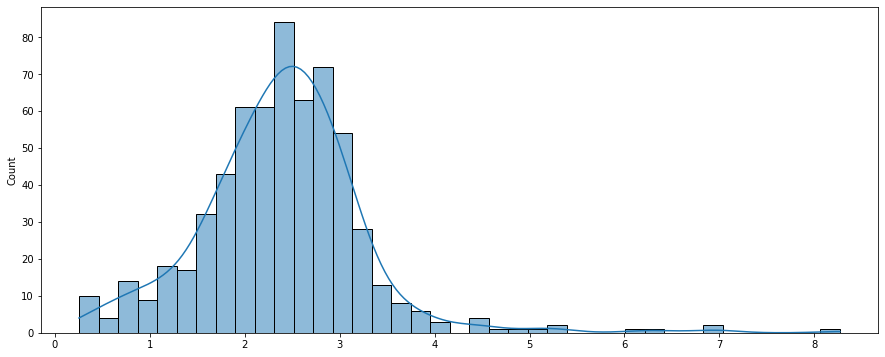

In [38]:
plt.figure(figsize=(15,6))
sns.histplot((df['LoanAmount']/df['Total_Income']*100), kde=True)
plt.show()

In [39]:
print('population applying for loan more than 4% of their total income')
len(df[df['LoanAmount']/df['Total_Income']*100 > 4])

population applying for loan more than 4% of their total income


17

In [40]:
print("Ratio of Loan Accepted and Rejected")
(df[df['LoanAmount']/df['Total_Income']*100 > 4])['Loan_Status'].value_counts()

Ratio of Loan Accepted and Rejected


0    13
1     4
Name: Loan_Status, dtype: int64

**Analysis**: There is less possibility for your loan to be accepted if you are applying for more than 0.04% of you total family Income.

Let's check also in what scenarios your Loan will be accepted.

In [41]:
temp = (df[df['LoanAmount']/df['Total_Income']*100 > 4])
temp[temp['Loan_Status']==1]

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status,Credit_Self,Total_Income
81,1,1,1,0,1,128.0,360.0,1,1,1,2395.0
255,0,0,3,0,0,255.0,360.0,0,1,1,3083.0
354,0,1,0,0,0,130.0,360.0,1,1,1,2928.0
604,0,1,1,0,0,496.0,360.0,1,1,1,12000.0


**Analysis**: So if you want to apply for the Loan Amount more than 4% of the total to family income, you must be Graduate, and Credit_Self (Credit_History should be 1 or Not Self_Employed) and also you're returning your money within a year. 

Now, also Loan_Amount_Term is just the term of days loan is given. Changing it into months.

In [42]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term']/30

In statistics, skewness and kurtosis are two ways to measure the shape of a distribution.

**Skewness** is a measure of the asymmetry of a distribution. This value can be positive or negative.

- A negative skew indicates that the tail is on the left side of the distribution, which extends towards more negative values.
- A positive skew indicates that the tail is on the right side of the distribution, which extends towards more positive values.
- A value of zero indicates that there is no skewness in the distribution at all, meaning the distribution is perfectly symmetrical.

**Kurtosis** is a measure of whether or not a distribution is heavy-tailed or light-tailed relative to a normal distribution.

- The kurtosis of a normal distribution is 3.
- If a given distribution has a kurtosis less than 3, it is said to be playkurtic, which means it tends to produce fewer and less extreme outliers than the normal distribution.
- If a given distribution has a kurtosis greater than 3, it is said to be leptokurtic, which means it tends to produce more outliers than the normal distribution.

In [43]:
# checking for the skewness of the columns
df.skew()

Gender             -1.648795
Married            -0.644850
Dependents          1.015551
Education           1.367622
Self_Employed       2.159796
LoanAmount          2.743053
Loan_Amount_Term   -2.402112
Property_Area      -0.066196
Loan_Status        -0.809998
Credit_Self        -2.159796
Total_Income        5.633449
dtype: float64

In [44]:
# checking for the kurtosis of the columns
df.kurtosis()

Gender               0.720863
Married             -1.589356
Dependents          -0.347376
Education           -0.130044
Self_Employed        2.673417
LoanAmount          10.936695
Loan_Amount_Term     6.924993
Property_Area       -1.383653
Loan_Status         -1.348306
Credit_Self          2.673417
Total_Income        45.784414
dtype: float64

So, together Skewness and Kurtosis together gives me a hypothetical idea about the columns we should have concerned about. These columns must be Total_Income, LoanAmount.

Let's check there distribution.

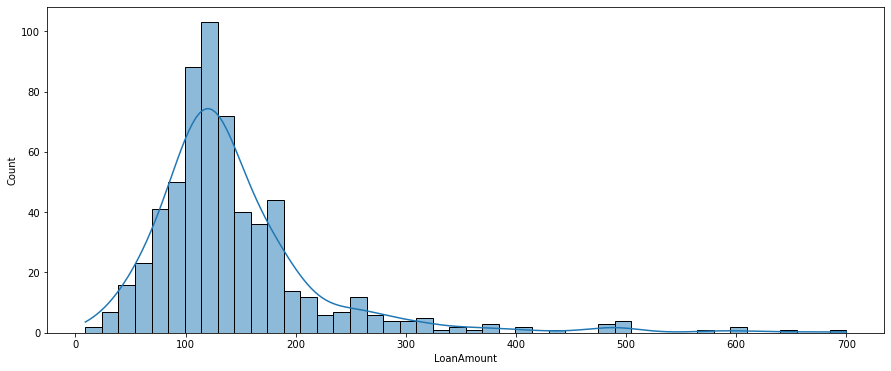

In [45]:
plt.figure(figsize=(15,6))
sns.histplot((df['LoanAmount']), kde=True)
plt.show()

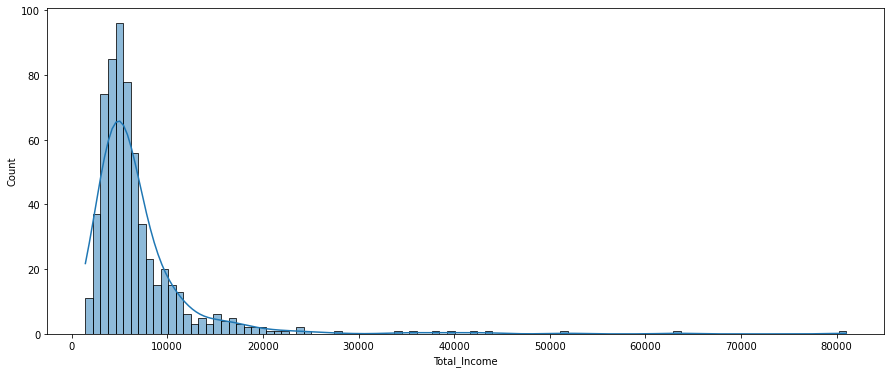

In [46]:
plt.figure(figsize=(15,6))
sns.histplot((df['Total_Income']), kde=True)
plt.show()

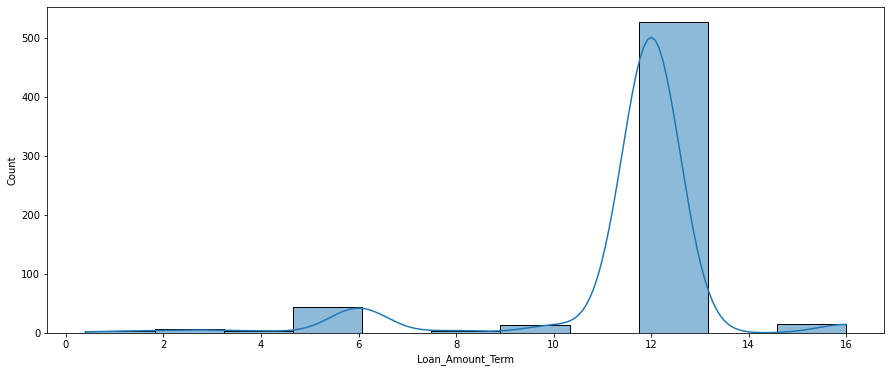

In [47]:
plt.figure(figsize=(15,6))
sns.histplot((df['Loan_Amount_Term']), kde=True)
plt.show()

**Log transformation**: Log transformation is a data transformation method in which it replaces each variable x with a log(x). Benefits of log transformation is, we can deal with outliers and skewness at the same time bacause as you know skewness happens because of outlier values present in our data.


In [48]:
df['LoanAmount'] = np.log(df['LoanAmount'])
df['Total_Income'] = np.log(df['Total_Income'])

In [49]:
df['Loan_per_Income'] = df['LoanAmount']/df['Total_Income']

In [50]:
df.drop(['LoanAmount'],axis=1, inplace=True)

### Logistic Regression

In [51]:
X = df.drop(["Loan_Status"], axis=1)
y = df['Loan_Status']

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=1000)

# fit the model with data
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)
print(logreg.score(X_train,y_train)*100)

81.35198135198135


Text(0.5, 257.44, 'Predicted label')

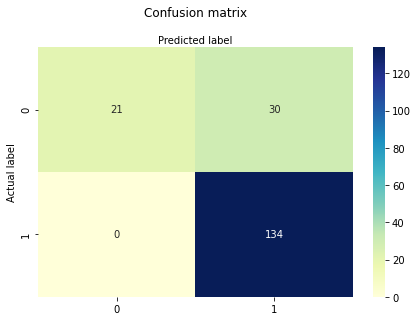

In [60]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [61]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8378378378378378
Precision: 0.8170731707317073
Recall: 1.0


### SVC

In [145]:
from sklearn.svm import SVC

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

svc = SVC(kernel ='linear' ,C= 1)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print(svc.score(X_train,y_train)*100)

82.98368298368298


Text(0.5, 257.44, 'Predicted label')

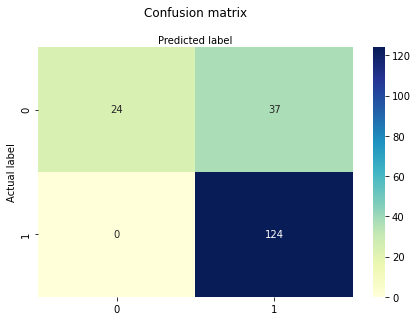

In [146]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [147]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8
Precision: 0.7701863354037267
Recall: 1.0


### RandomForest

In [142]:
X = df.drop(["Loan_Status"], axis=1)
y = df['Loan_Status']

In [143]:
from sklearn.ensemble import RandomForestClassifier

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

RF = RandomForestClassifier(n_jobs = -1, n_estimators=10, criterion='entropy')
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
print(RF.score(X_train,y_train)*100)

99.53379953379954


Text(0.5, 257.44, 'Predicted label')

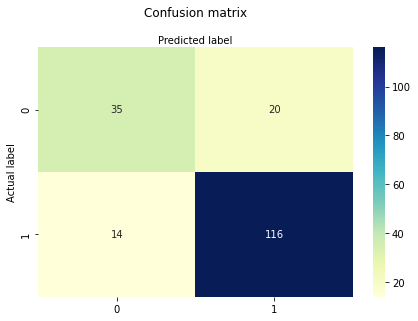

In [144]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [130]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7621621621621621
Precision: 0.7862068965517242
Recall: 0.8976377952755905


### GridSearchCV

In [151]:
from sklearn.model_selection import GridSearchCV

X = df.drop(["Loan_Status"], axis=1)
y = df['Loan_Status']

params = {'kernel':('linear', 'rbf'), 'C':(0.1,0,1,5,10,15,20)}

grid = GridSearchCV(estimator=svc, param_grid=params, scoring='accuracy', verbose=1, cv = 3, n_jobs=-1)
grid_result = grid.fit(X,y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  42 | elapsed:    0.8s remaining:    0.4s


Best: 0.820883 using {'C': 0.1, 'kernel': 'linear'}


[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    3.0s finished


### XGBoost

In [152]:
from xgboost import XGBClassifier

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\sacni\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:34:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Text(0.5, 257.44, 'Predicted label')

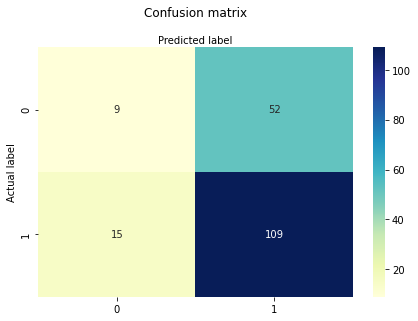

In [153]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [154]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6378378378378379
Precision: 0.6770186335403726
Recall: 0.8790322580645161
